In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import itertools
import seaborn as sns
sns.set()

In [5]:
p_info = pd.read_csv('pre_participants.csv')

In [6]:
summary = pd.DataFrame()
for pid in p_info['pid']:
    data = pd.read_csv('result/' + pid + '_KVIQ.csv', index_col=0)
    summary = summary.append(data)

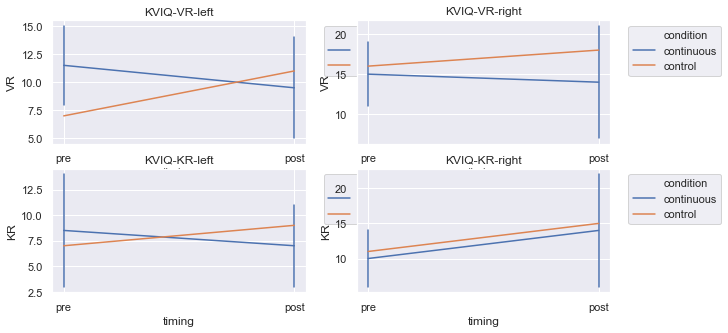

In [10]:
data = summary.groupby(['pid', 'condition', 'timing', 'hand'], as_index=False, sort=None).sum()
plt.figure(figsize=(10,5))
for i, (img, hand) in enumerate(itertools.product(['VR', 'KR'], ['left', 'right'])):
    plt.subplot(2, 2, i+1)
    sns.lineplot(x='timing', y=img, hue='condition', sort=False, err_style='bars', data=data[data.hand == hand])
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.title('KVIQ-' + img + '-' + hand)